In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
survey_raw_df = pd.read_csv("survey_results_public.csv")

In [39]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [40]:
schema_raw = pd.read_csv("survey_results_schema.csv",  index_col= "Column").QuestionText

In [41]:
# Questions that need to be answered with data 
schema_raw.head(20)

Column
Respondent                Randomized respondent ID number (not in order ...
MainBranch                Which of the following options best describes ...
Hobbyist                                            Do you code as a hobby?
Age                       What is your age (in years)? If you prefer not...
Age1stCode                At what age did you write your first line of c...
CompFreq                   Is that compensation weekly, monthly, or yearly?
CompTotal                 What is your current total compensation (salar...
ConvertedComp             Salary converted to annual USD salaries using ...
Country                                                  Where do you live?
CurrencyDesc              Which currency do you use day-to-day? If your ...
CurrencySymbol            Which currency do you use day-to-day? If your ...
DatabaseDesireNextYear    Which database environments have you done exte...
DatabaseWorkedWith        Which database environments have you done exte...
DevTy

In [42]:
selected_columns = [
    "Country",
    "Age",
    'Gender',
    'EdLevel',
    'UndergradMajor',
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    "NEWStuck",
    "Employment",
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'    
]

In [43]:
# 20 questions 
len(selected_columns)

20

In [44]:
# We are going to clean our data, so let's create a copy of it and don't change our original data
survey_df = survey_raw_df[selected_columns].copy()

In [45]:
survey_df.shape

(64461, 20)

In [46]:
schema = schema_raw[selected_columns]

In [47]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [48]:
survey_raw_df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


# Data preparation and cleaning

our data should be cleaned. Because there are some unusual data such as, maxium age of a respondent equal to 279 or there are sone NaN values that should be eliminated or replaced.

In [49]:
# for example there are some strings in Age column that need to be converted to intiger 
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [50]:
# with these lines of code, we delete the non-numerc responses in our data 
survey_df["Age1stCode"] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df["YearsCode"] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df["YearsCodePro"] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')

In [51]:
# we want the age to be betweeen 10 and 100, so more than or less than that should be deleted
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [52]:
# Also we can see that some respondent worked more than 140 hours in a week. so we need to eliminated them 
survey_df[survey_df.WorkWeekHrs > 140].index

Int64Index([ 1358,  2640,  3512,  3953,  6021,  6915,  6964,  7370,  7959,
             8296,
            ...
            58509, 58826, 58861, 59351, 59962, 59994, 60001, 61308, 61756,
            61923],
           dtype='int64', length=145)

In [53]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [54]:
survey_df["Country"].value_counts()

United States       12468
India                8393
United Kingdom       3894
Germany              3879
Canada               2189
                    ...  
Kiribati                1
Fiji                    1
Nauru                   1
Saint Lucia             1
Marshall Islands        1
Name: Country, Length: 183, dtype: int64

we can see that 12468 respondent were from United States and 8393 people from India and so on

In [55]:
survey_df["Gender"].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

we can see that some people picked multiple options and it is going to make our analysis difficult. So let's replace these with empty value

In [56]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [57]:
survey_df["Gender"].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

Let's look at the number of countries from which there are resposes in the survey, and plot the 10 countries with the highest number of responses

# Exploratory analysis and visiualization

In [122]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Country

In [123]:
survey_df.Country.nunique()

183

People from 183 countries participated in this survey
Now the data is ready, so let's visiualize some of the data.

In [124]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


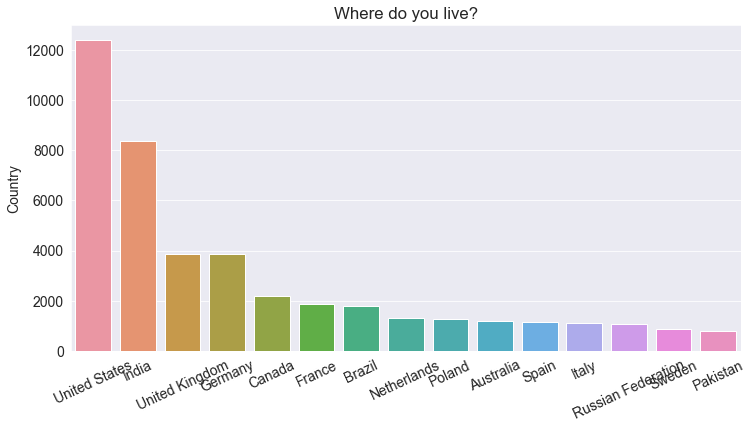

In [125]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=25)
plt.title(schema_raw.Country)
sns.barplot(top_countries.index, top_countries);

## Age
Let's visiulize the age of the respondents

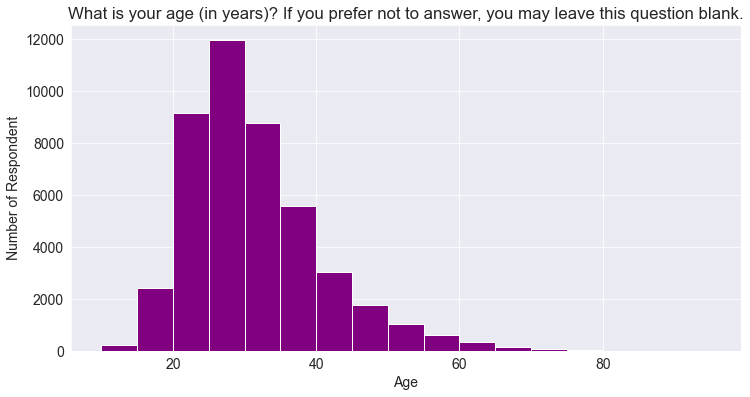

In [126]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel("Age")
plt.ylabel("Number of Respondent")
plt.hist(survey_df.Age, bins=np.arange(10, 100, 5), color="purple");

In [127]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

Lest's look at the distribution of esponses for the Gender

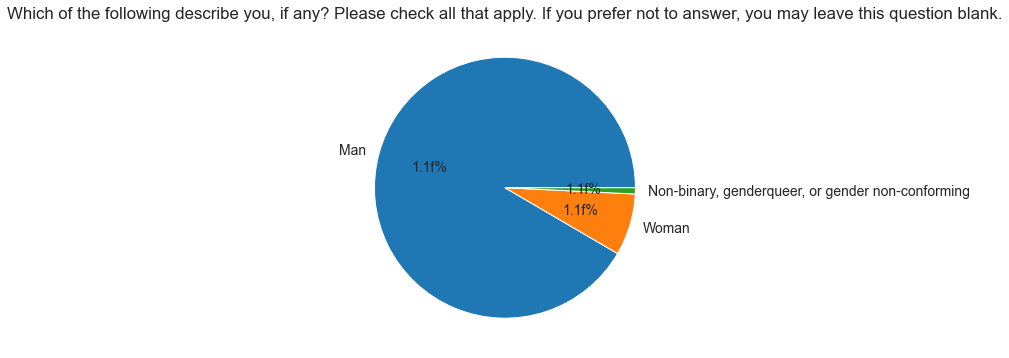

In [128]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct="1.1f%%");

## Education level

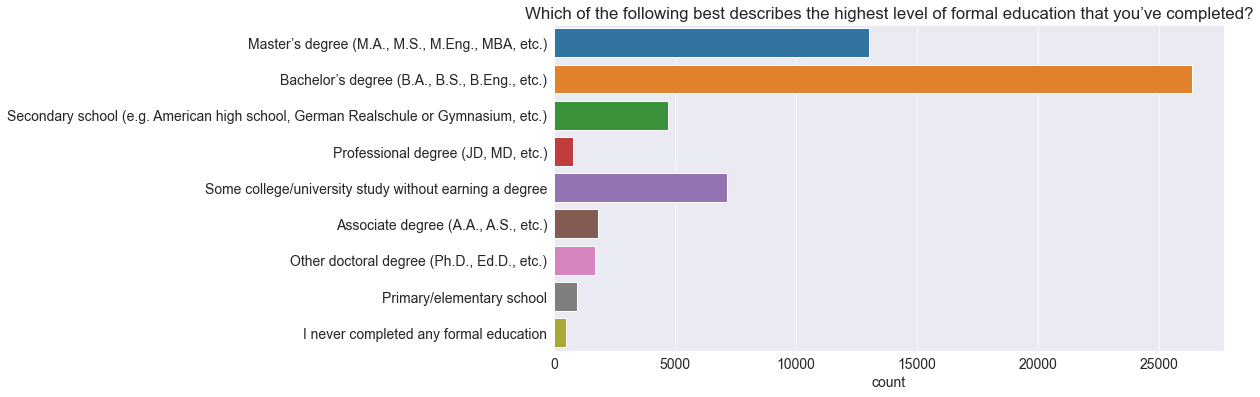

In [129]:
plt.figure(figsize=(12,6))
sns.countplot(y=survey_df.EdLevel)
plt.title(schema["EdLevel"])
plt.ylabel(None);

In [130]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [131]:
schema.UndergradMajor

'What was your primary field of study?'

In [132]:
survey_df.UndergradMajor.count()

50619

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


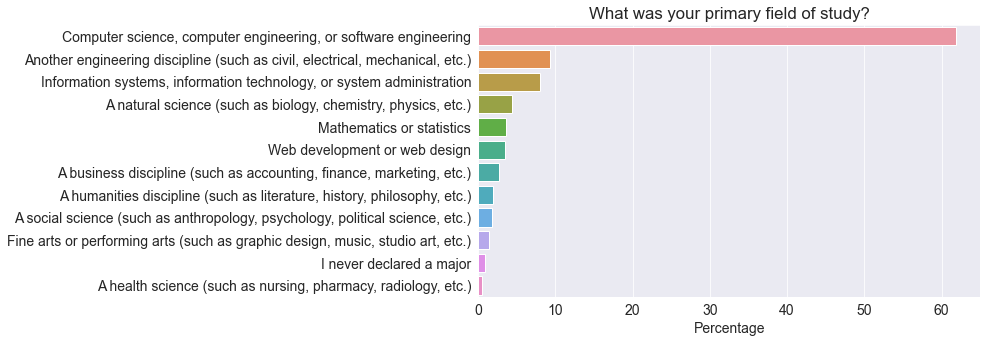

In [133]:
undergrad_pct = survey_df.UndergradMajor.value_counts() *100 / survey_df.UndergradMajor.count()
sns.barplot(undergrad_pct, undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel("Percentage");

In [134]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [135]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [136]:
language_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

## Employment

In [72]:
schema.Employment

'Which of the following best describes your current employment status?'

Text(0.5, 0, 'Percentage')

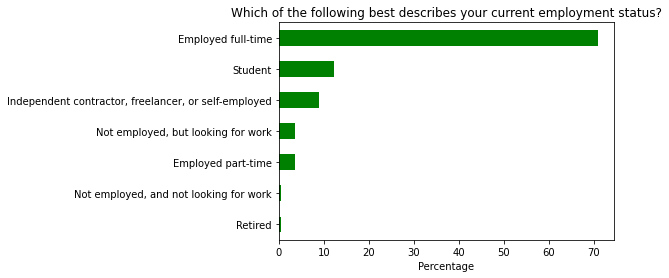

In [73]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind="barh", color="g")
plt.title(schema.Employment)
plt.xlabel('Percentage')

In [74]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [75]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [76]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value in col_series[col_series.notnull()].iteritems():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]        

In [77]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [78]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

Which were the most popular programming language in 2020?

In [116]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [117]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [118]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [119]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


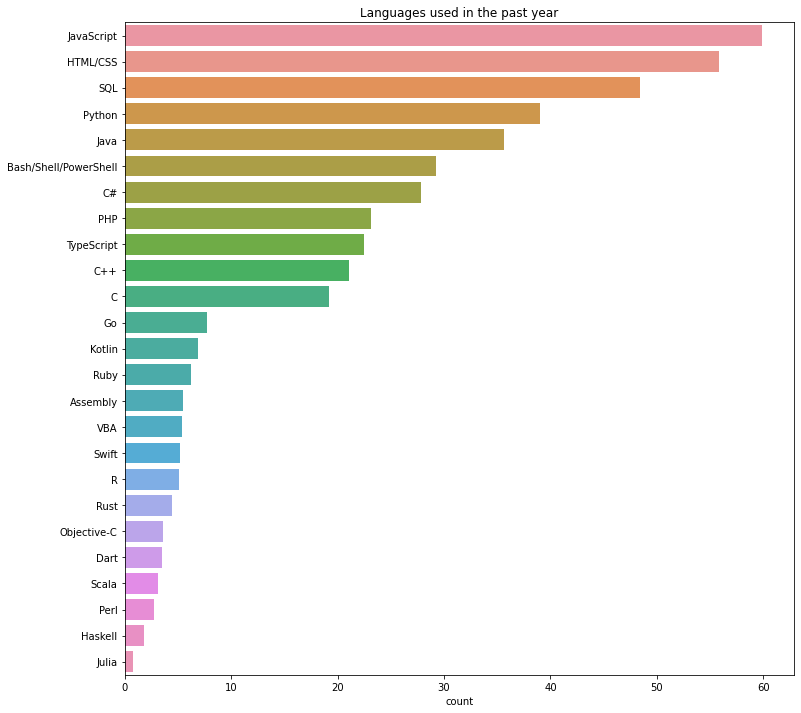

In [84]:
plt.figure(figsize=(12, 12))
sns.barplot(languages_worked_percentages, languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel("count");

Which languages are the most people interested to learn over the next year?

In [85]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False)
languages_interested_percentages

Python                   0.411439
JavaScript               0.404255
HTML/CSS                 0.320281
SQL                      0.307996
TypeScript               0.264517
C#                       0.210587
Java                     0.204647
Go                       0.194321
Bash/Shell/PowerShell    0.180574
Rust                     0.162706
C++                      0.150142
Kotlin                   0.147607
PHP                      0.109477
C                        0.093599
Swift                    0.086928
Dart                     0.073088
R                        0.065717
Ruby                     0.064255
Scala                    0.053261
Haskell                  0.045937
Assembly                 0.037664
Julia                    0.025410
Objective-C              0.023388
Perl                     0.017619
VBA                      0.016110
dtype: float64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

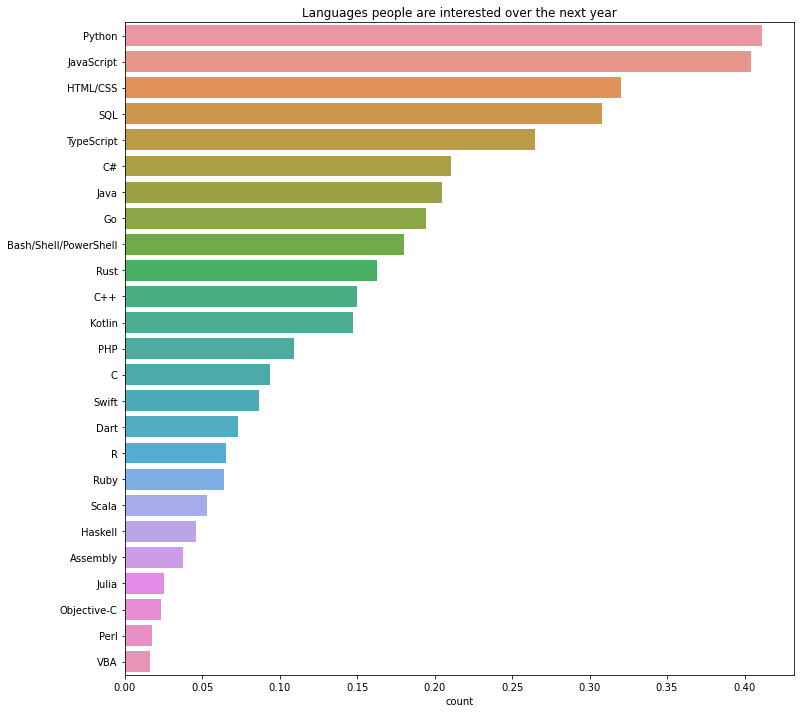

In [86]:
plt.figure(figsize=(12, 12))
sns.barplot(languages_interested_percentages, languages_interested_percentages.index)
plt.title("Languages people are interested over the next year")
plt.xlabel("count")

Which are the most loved langiages i.e. a high percentage of people who have used the languag want to continue learning & using it over the next yaer?

In [87]:
languages_loved_df = languages_worked_df & languages_interested_df

In [89]:
languages_loved_percentages = (languages_loved_df.sum() *100/ languages_worked_df.sum()).sort_values(ascending=False)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


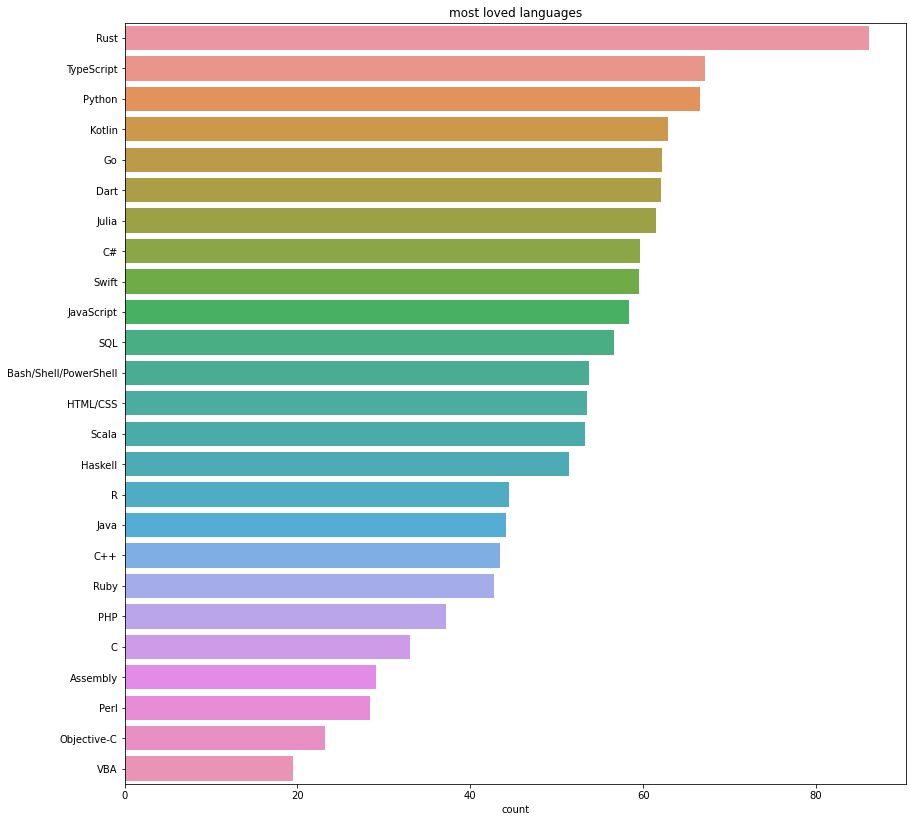

In [91]:
plt.figure(figsize=(14, 14))
sns.barplot(languages_loved_percentages, languages_loved_percentages.index)
plt.title("most loved languages");
plt.xlabel("count");


In which countries do developers work the highest number of hours per week? Concider countries with more than 250 responses only

In [98]:
countries_df = survey_df.groupby("Country")[['WorkWeekHrs']].mean().sort_values("WorkWeekHrs", ascending=False)

In [99]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [101]:
high_response_countries_df


,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


How important is it to start young to build a career in programming?

In [102]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


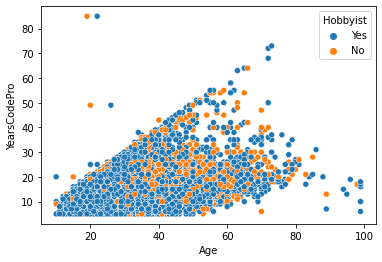

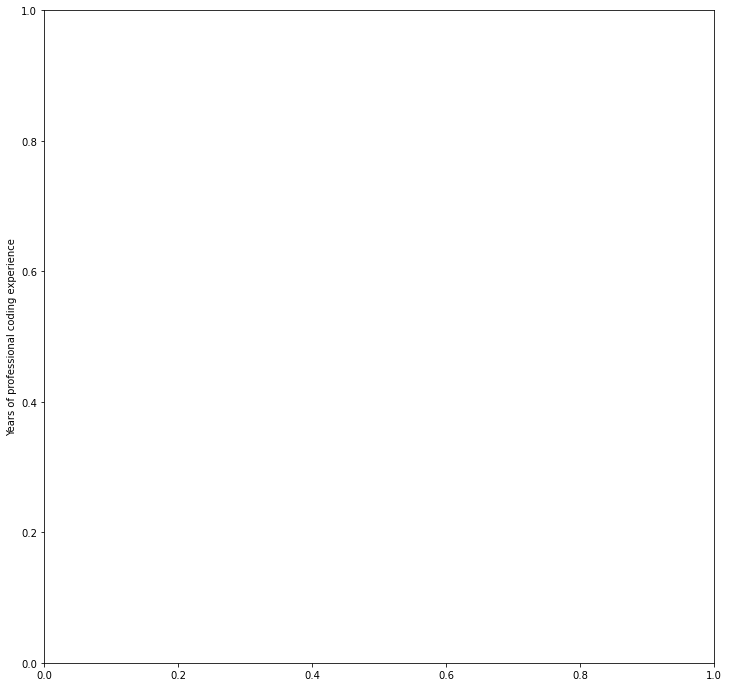

In [110]:
sns.scatterplot('Age', 'YearsCodePro', hue="Hobbyist", data=survey_df)
plt.xlabel("Age")
plt.figure(figsize=(12, 12))
plt.ylabel("Years of professional coding experience");

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


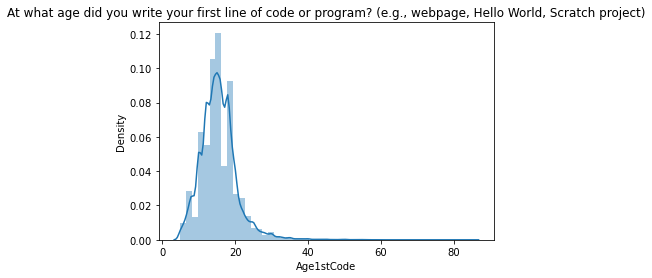

In [111]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode);